### AdaBoost (Adaptive Boosting)

This used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. **AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers.AdaBoost is sensitive to noisy data and outliers.In some problems it can be less susceptible to the overfitting problem than other learning algorithms**

The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner.
**AdaBoost (with decision trees as the weak learners) is often referred to as the best out-of-the-box classifier.When used with decision tree learning, information gathered at each stage of the AdaBoost algorithm about the relative 'hardness' of each training sample is fed into the tree growing algorithm such that later trees tend to focus on harder-to-classify examples.** .Taken from wiki/AdaBoost

The weak learners in AdaBoost are decision trees with a single split, called decision stumps. 
AdaBoost works by putting more weight on those which are misclassified by last week learner and less on those already handled well. Weak models are added sequentially, trained using the weighted training data. Generally, the process continues until a pre-set number of weak learners have been created. Once completed, you are left with a pool of weak learners each with a stage value. Predictions are made by calculating the weighted average of the weak classifiers.

AdaBoost algorithms can be used for both classification and regression problem.

### Comarission how Adaboost boost the performance of model when we use more week learner(Decesion Tree) compared to 1 Decesion Tree model
A decision tree is boosted using the AdaBoost algorithm on a 1D sinusoidal dataset with a small amount of Gaussian noise. 299 boosts (300 decision trees) is compared with a single decision tree regressor. As the number of boosts is increased the regressor can fit more detail.

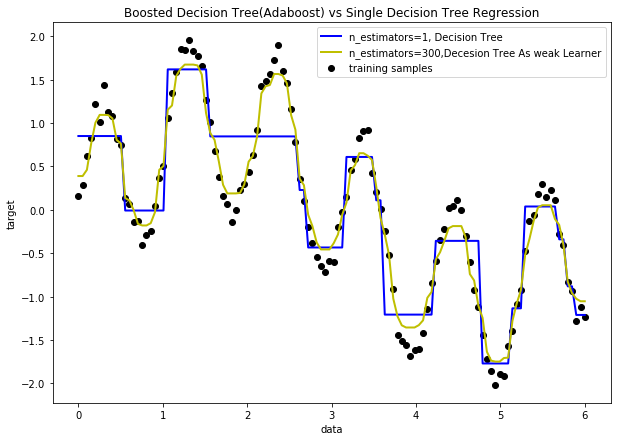

In [1]:
# importing necessary libraries  ## Used code from Sklean 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 120)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])
## Read this to understant the Ravel https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=100,learning_rate= 1, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure(figsize=(10,7))
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="b", label="n_estimators=1, Decision Tree", linewidth=2)
plt.plot(X, y_2, c="y", label="n_estimators=300,Decesion Tree As weak Learner", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree(Adaboost) vs Single Decision Tree Regression")
plt.legend()
plt.show()

#### AdaBoost for Classification

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. 
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

1. age: age in years
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)
5. chol : serum cholestoral in mg/dl
6. fbs :(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg : resting electrocardiographic results
8. thalach : maximum heart rate achieved
9. exang : exercise induced angina (1 = yes; 0 = no)
10. oldpeak : ST depression induced by exercise relative to rest
11. slope : the slope of the peak exercise ST segment
12. ca : number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target : 1 or 0 



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib inline

In [3]:
df_heart = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/heart_disease/heart.csv")

In [4]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
X = df_heart.iloc[:,0:-1]

In [7]:
y = df_heart.target

In [8]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(303, 13)
(303,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
## Lets do  train and test split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(type(X_train))
print(type(y_train))
print(X_test.shape)
print(y_test.shape)
print(type(X_test))
print(type(y_test))

(212, 13)
(212,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(91, 13)
(91,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
## Apply adaboost and Decission Tree Classifier
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                             n_estimators=50,
                             learning_rate=0.02,
                             algorithm='SAMME.R',
                             random_state=None,)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [12]:
y_pred_test = ada_clf.predict(X_test)
y_pred_train = ada_clf.predict(X_train)

In [13]:
Accuracy_test_data = metrics.accuracy_score(y_pred_test,y_test)
Accuracy_test_data

0.8241758241758241

In [14]:
conf_met = metrics.confusion_matrix(y_pred_test,y_test)
conf_met

array([[32,  7],
       [ 9, 43]], dtype=int64)

In [15]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x159b712d208>)

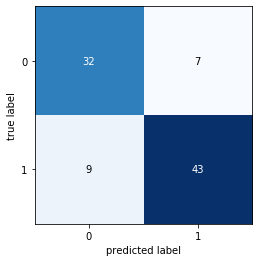

In [16]:
plot_confusion_matrix(conf_mat=conf_met)

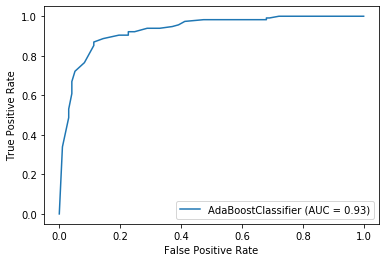

In [17]:
metrics.plot_roc_curve(ada_clf,X_train,y_train)

In [18]:
param_ad = {"base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
                             "n_estimators":[20,30,50,100,200,300],
                             "learning_rate" : [0.001,0.01,0.02,1]}

In [19]:
grid_sea_ada_clf = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=param_ad,cv = 5,scoring="accuracy")

In [20]:
grid_sea_ada_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight=None,
                                                                   criterion='gini',
                                                                   max_depth=1,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_...
                                                               

In [21]:
grid_sea_ada_clf.best_score_

0.8442967884828348

In [22]:
grid_sea_ada_clf.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'learning_rate': 0.01,
 'n_estimators': 200}

Like Random Forest, AdaBoost makes predictions by applying multiple decision trees to every sample and combining the predictions made by individual trees. However, rather than taking the average of the predictions made by each decision tree in the forest (or majority in the case of classification), in the AdaBoost algorithm, every decision tree contributes a varying amount to the final prediction.

We can use Grid Search to find the best value of learning rate and Tree max depth and number of Iterations and on that basis we can select our final best parameter.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
grd_clf = GradientBoostingClassifier(n_estimators=20, 
                                     learning_rate=0.1, max_features=2, max_depth=2, random_state=0)

In [25]:
grd_clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [26]:
y_pred_test_grd = grd_clf.predict(X_test)

In [27]:
Accuracy_test_data_grd = metrics.accuracy_score(y_pred_test_grd,y_test)
Accuracy_test_data_grd

0.8351648351648352

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
## Lets us the Gridsearch to find the best parameter for Gradient Boost
param = {"learning_rate":[0.001,0.01,.1,1],
    "n_estimators":[10,20,40,50,100,500,1000],
    "max_depth":[1,2,3,4,5,10,15,20]
        }

In [30]:
grdsearch_grd_clf = GridSearchCV(grd_clf,param_grid=param,scoring = 'accuracy',cv=5)

In [31]:
grdsearch_grd_clf.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=2,
                                                  max_features=2,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=20,
                                                  n_iter_no_chang...
                 

In [32]:
grdsearch_grd_clf.best_score_

0.8546994535519126

In [33]:
grdsearch_grd_clf.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 20}